In [51]:
# Import necessary libraries
import numpy as np
np.random.seed(20231026)


# Set simulation parameters
Nruns = 10000  # Number of simulations
Nsteps = [10, 100, 1000]  # Different time steps
dic_pos = {}  # Dictionary to store simulation results

# Define two scenarios: p1 and p2, each with different movement probabilities
probe = {'p1': [1/3, 1/3, 1/3], 'p2': [0, 1/2, 1/2]}

# Iterate over the two scenarios
for x in probe.keys():
    # Iterate over different time steps
    for k in Nsteps:
        results = []  # List to store simulation results
        for i in range(Nruns):
            position = 0  # Initial position is 0
            for s in range(0, k):
                # Randomly choose a direction to move, with probabilities determined by probe[x]
                move = np.random.choice([-1, 0, 1], p=probe[x])
                position += move  # Update position
            results.append(position)  # Store the final position
        # Store the results in the dictionary 
        dic_pos[str(x) + '_Nsteps_' + str(k)] = results


 
        

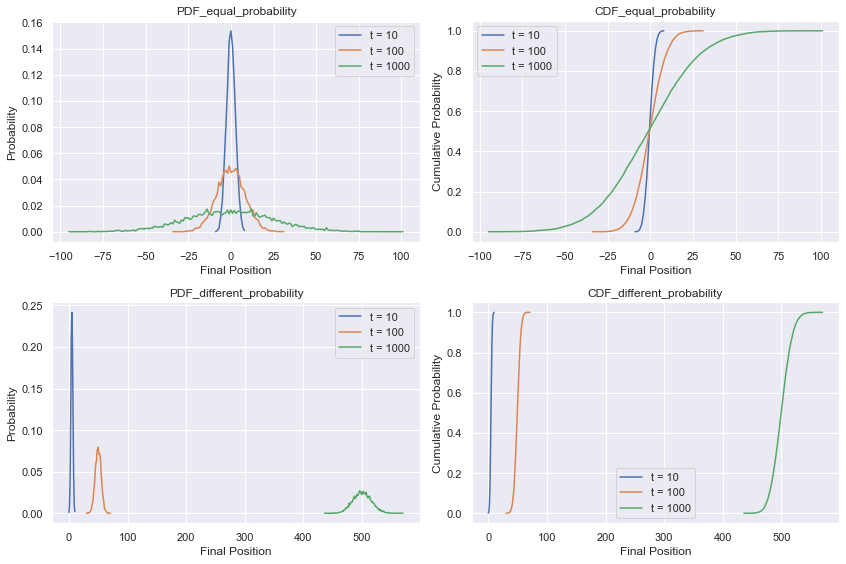

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Create a figure with a 2x2 grid for subplots
plt.figure(figsize=(12, 8))

# Loop through the data stored in dic_pos
for h in dic_pos.keys():
    if h.split('_')[0] == 'p1':
        # Extract time step (t)
        st = h.split('_')[2]

        # Calculate PDF and bins
        pdf, bins = np.histogram(dic_pos[h], bins=range(min(dic_pos[h]), max(dic_pos[h]) + 2), density=True)
        cdf = np.cumsum(pdf)

        # Plot PDF for equal probability scenario
        plt.subplot(2, 2, 1)
        plt.plot(bins[:-1], pdf, label=f"t = {st}")
        plt.title("PDF_equal_probability")
        plt.xlabel("Final Position")
        plt.ylabel("Probability")
        plt.legend()

        # Plot CDF for equal probability scenario
        plt.subplot(2, 2, 2)
        plt.plot(bins[:-1], cdf, label=f"t = {st}")
        plt.title("CDF_equal_probability")
        plt.xlabel("Final Position")
        plt.ylabel("Cumulative Probability")
        plt.legend()
    else:
        # Extract time step (t)
        st = h.split('_')[2]

        # Calculate PDF and bins
        pdf, bins = np.histogram(dic_pos[h], bins=range(min(dic_pos[h]), max(dic_pos[h]) + 2), density=True)
        cdf = np.cumsum(pdf)

        # Plot PDF for different probability scenario
        plt.subplot(2, 2, 3)
        plt.plot(bins[:-1], pdf, label=f"t = {st}")
        plt.title("PDF_different_probability")
        plt.xlabel("Final Position")
        plt.ylabel("Probability")
        plt.legend()

        # Plot CDF for different probability scenario
        plt.subplot(2, 2, 4)
        plt.plot(bins[:-1], cdf, label=f"t = {st}")
        plt.title("CDF_different_probability")
        plt.xlabel("Final Position")
        plt.ylabel("Cumulative Probability")
        plt.legend()

# Adjust the layout of the subplots
plt.tight_layout()

# Display the plots
plt.show()

In the first case,  the random walker has an equal probability (1/3) of moving to the left, moving to the right, or staying in place at each time step. As a result, the walker is equally likely to move in either direction or stay put, leading to a more balanced distribution of final positions. The PDF and CDF plots for this case shows a relatively symmetric distribution of final positions.
In the second case,  the random walker has a higher probability (1/2) of moving to the right and an equal probability (1/2) of staying in place or moving to the left. As a result, the walker is more likely to move to the right, which leads to a bias in the direction of movement. The PDF and CDF plots for this case shows a distribution skewed toward the right(positive final position value), indicating a higher probability of ending up to the right of the starting position. And with the increase of step number, the total distribution will moved to right too.